<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.
このノートブックでは、このコースで学んだすべての分類アルゴリズムを実践しようとしています。

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.
Pandas ライブラリを使用してデータセットを読み込み、次のアルゴリズムを適用し、精度評価方法によってこの特定のデータセットに最適なアルゴリズムを見つけます。
Let's first load required libraries:
最初に必要なライブラリをロードしましょう:


In [1]:
!pip install scikit-learn==0.23.1
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 106.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 35.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [2]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-09-27 22:11:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-09-27 22:11:17 (75.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object


In [12]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [13]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [14]:
# notice: installing seaborn might takes a few minutes
!pip install seaborn

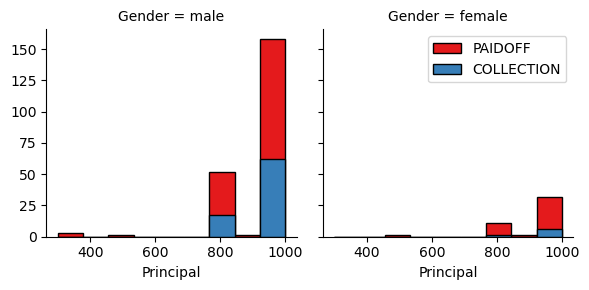

In [15]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

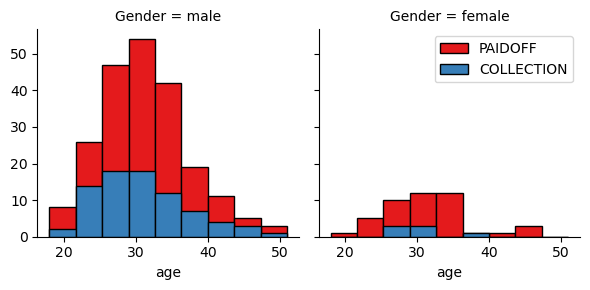

In [16]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


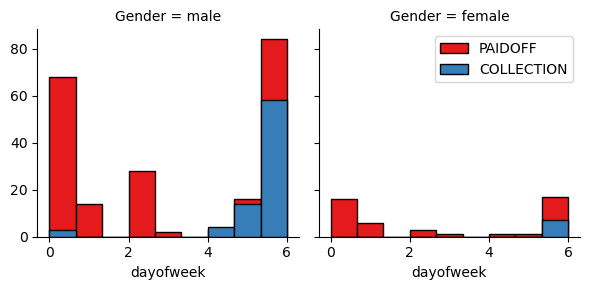

In [17]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [18]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [19]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [20]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [21]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [22]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [23]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [24]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [25]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [26]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [27]:
!pip install scikit-learn==0.23.1

In [161]:
#Let's load required libraries
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])
await piplite.install(['scipy'])

ModuleNotFoundError: No module named 'piplite'

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [30]:
#from pyodide.http import pyfetch
#
#async def download(url, filename):
#    response = await pyfetch(url)
#    if response.status == 200:
#        with open(filename, "wb") as f:
#            f.write(await response.bytes())

ModuleNotFoundError: No module named 'pyodide'

In [31]:
path="https://cf-courses-data.s3.us.cloud!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv"

In [32]:
#await download(path, 'loan_train.csv')

NameError: name 'download' is not defined

In [33]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


#Data visualization and pre-processing データの前処理

In [34]:
df.shape

(346, 10)

In [36]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [37]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

array([[<AxesSubplot:title={'center':'Principal'}>]], dtype=object)

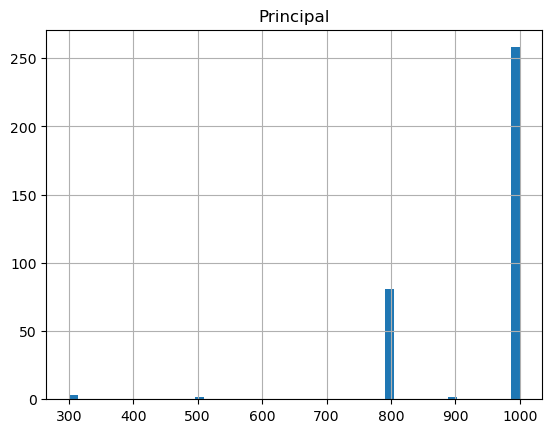

In [38]:
df.hist(column='Principal', bins=50)

In [39]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

#Let’s see how many of each class is in our data set データセットに各クラスがいくつあるか見てみましょう

In [41]:
X = df[['Unnamed: 0.1', 'Unnamed: 0','loan_status', 'Principal', 'terms', 'effective_date', 'due_date', 'age', 'education', 'Gender']] .values  #.astype(float)
#X = df[['Unnamed: 0.1', 'Unnamed: 0','loan_status', 'Principal', 'terms', 'effective_date', 'due_date', 'age', 'education']] .values  #.astype(float)

X[0:5]


array([[0, 0, 'PAIDOFF', 1000, 30, Timestamp('2016-09-08 00:00:00'),
        Timestamp('2016-10-07 00:00:00'), 45, 'High School or Below',
        'male'],
       [2, 2, 'PAIDOFF', 1000, 30, Timestamp('2016-09-08 00:00:00'),
        Timestamp('2016-10-07 00:00:00'), 33, 'Bechalor', 'female'],
       [3, 3, 'PAIDOFF', 1000, 15, Timestamp('2016-09-08 00:00:00'),
        Timestamp('2016-09-22 00:00:00'), 27, 'college', 'male'],
       [4, 4, 'PAIDOFF', 1000, 30, Timestamp('2016-09-09 00:00:00'),
        Timestamp('2016-10-08 00:00:00'), 28, 'college', 'female'],
       [6, 6, 'PAIDOFF', 1000, 30, Timestamp('2016-09-09 00:00:00'),
        Timestamp('2016-10-08 00:00:00'), 29, 'college', 'male']],
      dtype=object)

In [42]:
y = df['Gender'].values
y[0:5]

array(['male', 'female', 'male', 'female', 'male'], dtype=object)

In [43]:
y = df['education'].values
y[0:50]

array(['High School or Below', 'Bechalor', 'college', 'college',
       'college', 'college', 'college', 'college', 'college',
       'High School or Below', 'college', 'college',
       'High School or Below', 'college', 'High School or Below',
       'High School or Below', 'High School or Below', 'college',
       'college', 'High School or Below', 'college',
       'High School or Below', 'Bechalor', 'Bechalor', 'college',
       'college', 'High School or Below', 'college', 'college', 'college',
       'college', 'High School or Below', 'Bechalor', 'college',
       'college', 'Bechalor', 'college', 'Bechalor',
       'High School or Below', 'High School or Below', 'college',
       'High School or Below', 'Bechalor', 'Bechalor',
       'High School or Below', 'High School or Below', 'college',
       'High School or Below', 'Bechalor', 'High School or Below'],
      dtype=object)

In [44]:
y = df['age'].values
y[0:5]

array([45, 33, 27, 28, 29])

In [45]:
y = df['due_date'].values
y[0:5]

array(['2016-10-07T00:00:00.000000000', '2016-10-07T00:00:00.000000000',
       '2016-09-22T00:00:00.000000000', '2016-10-08T00:00:00.000000000',
       '2016-10-08T00:00:00.000000000'], dtype='datetime64[ns]')

In [46]:
y = df['effective_date'].values
y[0:5]

array(['2016-09-08T00:00:00.000000000', '2016-09-08T00:00:00.000000000',
       '2016-09-08T00:00:00.000000000', '2016-09-09T00:00:00.000000000',
       '2016-09-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [47]:
y = df['terms'].values
y[0:50]

array([30, 30, 15, 30, 30, 30, 30, 15,  7, 15, 30,  7,  7, 15, 30, 15, 30,
       30, 30, 30, 15, 30, 15, 15, 30, 30, 15, 30, 30, 30, 15, 30, 30, 15,
       15,  7, 15, 15,  7, 30, 30, 15, 30, 15, 30, 30, 15, 30, 30, 15])

In [48]:
y = df['Principal'].values
y[0:50]

array([1000, 1000, 1000, 1000, 1000, 1000, 1000,  800,  300, 1000, 1000,
        900, 1000,  800, 1000, 1000, 1000,  800, 1000, 1000, 1000, 1000,
        800, 1000, 1000, 1000,  800, 1000, 1000, 1000,  800, 1000, 1000,
       1000,  800, 1000, 1000, 1000,  800, 1000, 1000,  800, 1000,  800,
       1000, 1000, 1000, 1000, 1000,  800])

In [49]:
y = df['loan_status'].values
y[0:50]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

In [50]:
y = df['Unnamed: 0'].values
y[0:50]

array([ 0,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 53, 54, 55, 56, 57, 58])

In [51]:
y = df['Unnamed: 0.1'].values
y[0:50]

array([ 0,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 53, 54, 55, 56, 57, 58])

In [52]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [53]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [54]:
#性別を0、1変換する男性：0、女性：1
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [55]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [56]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [57]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [58]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [77]:
y = df['loan_status'].values
y[0:1000]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

In [60]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [63]:
#Import library
#Classifier implementing the k-nearest neighbors vote.
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Training Let's start the algorithm with k=4 for now:

In [64]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [65]:
#Predicting : We can use the model to make predictions on the test set:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [66]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8152173913043478
Test set Accuracy:  0.6857142857142857


In [67]:
#Practice
k = 4
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.8152173913043478
Test set Accuracy:  0.6857142857142857


In [68]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

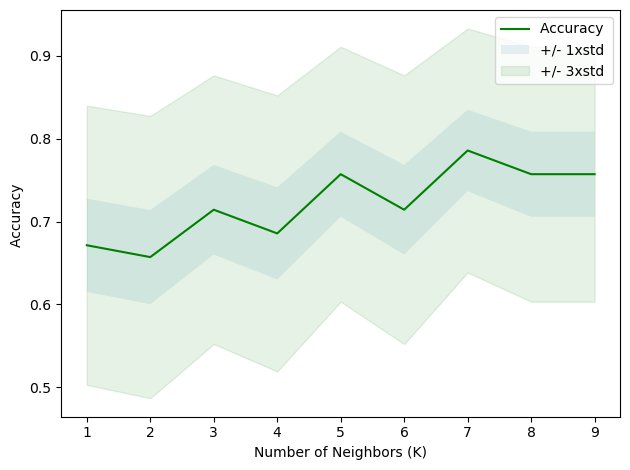

In [69]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [70]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 7


# Decision Tree


In [122]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [123]:
df.shape

(346, 10)

In [124]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

In [125]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,0,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,0,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,0,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,0,1000,30,9/9/2016,10/8/2016,29,college,male


In [130]:
df[['Principal','loan_status','age','Gender','education']].head()
Feature = df[['Principal','loan_status','age','Gender','education']]
Feature = pd.concat([Feature,pd.get_dummies(df['Gender'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.drop(['Gender'], axis = 1,inplace=True)
Feature.drop(['education'], axis = 1,inplace=True)
Feature.head()
X = Feature
X[0:5]

,Principal,loan_status,age,female,male,Bechalor,High School or Below,college
0,1000,0,45,0,1,0,1,0
1,1000,0,33,1,0,1,0,0
2,1000,0,27,0,1,0,0,1
3,1000,0,28,1,0,0,0,1
4,1000,0,29,0,1,0,0,1


In [131]:
X[0:]

,Principal,loan_status,age,female,male,Bechalor,High School or Below,college
0,1000,0,45,0,1,0,1,0
1,1000,0,33,1,0,1,0,0
2,1000,0,27,0,1,0,0,1
3,1000,0,28,1,0,0,0,1
4,1000,0,29,0,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,1,32,0,1,0,1,0
342,1000,1,25,0,1,0,1,0
343,800,1,39,0,1,0,0,1
344,1000,1,28,0,1,0,0,1


In [133]:
#Now we can fill the target variable.
y = X["Principal"]
y[0:5]

0    1000
1    1000
2    1000
3    1000
4    1000
Name: Principal, dtype: int64

In [143]:
#Setting up the Decision Tree
#We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

<h3>Now train_test_split will return 4 different parameters. We will name them:
これで、train_test_split は 4 つの異なるパラメーターを返します。 それらに名前を付けます：
X_trainset, X_testset, y_trainset, y_testset

The train_test_split will need the parameters:
The train_test_split には次のパラメーターが必要です。
X, y, test_size=0.3, and random_state=3.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.
X と y は分割前に必要な配列で、test_size はテスト データセットの比率を表し、random_state は同じ分割を取得することを保証します。</h3>

In [144]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [145]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (242, 8) &  Size of Y training set (242,)


In [146]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (104, 8) &  Size of Y training set (104,)


In [149]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#drugTree # it shows the default parameters

In [150]:
loanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [151]:
predTree = loanTree.predict(X_testset)

In [152]:
print (predTree [0:5])
print (y_testset [0:5])

[ 800 1000 1000  800 1000]
73      800
24     1000
282    1000
295     800
163    1000
Name: Principal, dtype: int64


In [153]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


In [ ]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

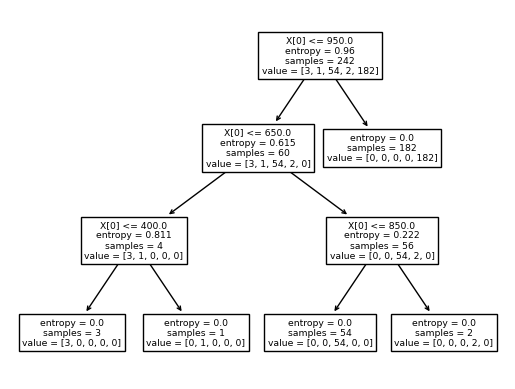

In [155]:
tree.plot_tree(loanTree)
plt.show()

# Support Vector Machine


In [6]:
!pip install scikit-learn==0.23.1

In [7]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [78]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,male


In [79]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [83]:
df[['Principal','loan_status', 'terms', 'effective_date', 'due_date', 'age','Gender','education', 'dayofweek','weekend']].head()
#feat = df[['Principal','loan_status','age','Gender','education']]
loan_df = df[['Principal', 'loan_status', 'terms', 'effective_date', 'due_date', 'age', 'Gender', 'education', 'dayofweek', 'weekend']]
loan_df = pd.concat([loan_df,pd.get_dummies(df['Gender'])], axis=1)
loan_df = pd.concat([loan_df,pd.get_dummies(df['education'])], axis=1)
loan_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
loan_df.drop(['Master or Above'], axis = 1,inplace=True)
loan_df.drop(['education'], axis = 1,inplace=True)
#loan_df.drop(['Gender'], axis = 1,inplace=True)
loan_df['loan_status'].replace(to_replace=[0,1], value=[1,3],inplace=True)
loan_df.head()

,Principal,loan_status,terms,effective_date,due_date,age,Gender,dayofweek,weekend,female,male,Bechalor,High School or Below,college
0,1000,1,30,2016-09-08,2016-10-07,45,0,3,0,0,1,0,1,0
1,1000,1,30,2016-09-08,2016-10-07,33,1,3,0,1,0,1,0,0
2,1000,1,15,2016-09-08,2016-09-22,27,0,3,0,0,1,0,0,1
3,1000,1,30,2016-09-09,2016-10-08,28,1,4,1,1,0,0,0,1
4,1000,1,30,2016-09-09,2016-10-08,29,0,4,1,0,1,0,0,1


In [84]:
X = loan_df
X[0:5]

,Principal,loan_status,terms,effective_date,due_date,age,Gender,dayofweek,weekend,female,male,Bechalor,High School or Below,college
0,1000,1,30,2016-09-08,2016-10-07,45,0,3,0,0,1,0,1,0
1,1000,1,30,2016-09-08,2016-10-07,33,1,3,0,1,0,1,0,0
2,1000,1,15,2016-09-08,2016-09-22,27,0,3,0,0,1,0,0,1
3,1000,1,30,2016-09-09,2016-10-08,28,1,4,1,1,0,0,0,1
4,1000,1,30,2016-09-09,2016-10-08,29,0,4,1,0,1,0,0,1


In [ ]:
#loan_ status,Principal, male 男性数とローン金額に基づくローンステイタスの分布を見てみましょう。

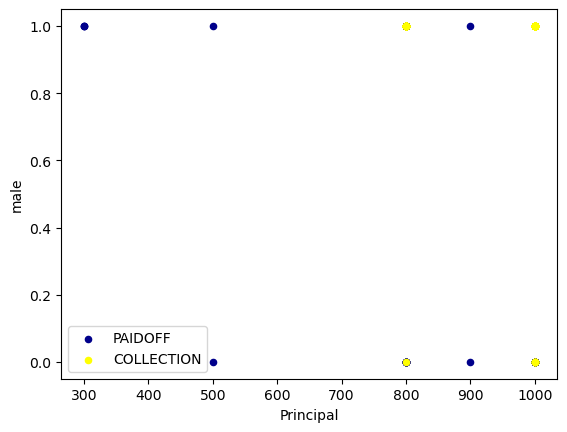

In [85]:
ax = X[X['loan_status'] == 1][0:1000].plot(kind='scatter', x='Principal', y='male', color='DarkBlue', label='PAIDOFF');
X[X['loan_status'] == 3][0:1000].plot(kind='scatter', x='Principal', y='male', color='Yellow', label='COLLECTION', ax=ax);
plt.show()

In [ ]:
#loan_ status, age, female　女性数と年齢に基づくローンステイタスの分布を見てみましょう。

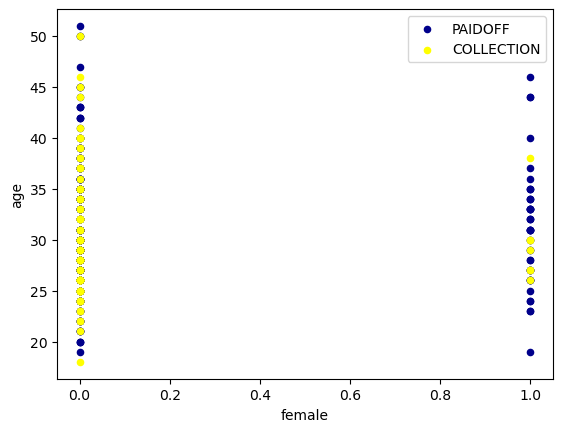

In [86]:
ax = X[X['loan_status'] == 1][0:1000].plot(kind='scatter', x='female', y='age', color='DarkBlue', label='PAIDOFF');
X[X['loan_status'] == 3][0:1000].plot(kind='scatter', x='female', y='age', color='Yellow', label='COLLECTION', ax=ax);
plt.show()

In [71]:
#loan_ status,age, Gender 性別と年齢に基づくローンステイタスの分布を見てみましょう。

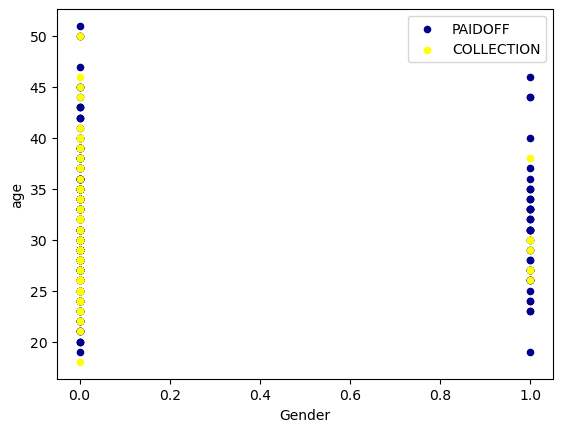

In [109]:
ax = X[X['loan_status'] == 1][0:1000].plot(kind='scatter', x='Gender', y='age', color='DarkBlue', label='PAIDOFF');
X[X['loan_status'] == 3][0:1000].plot(kind='scatter', x='Gender', y='age', color='Yellow', label='COLLECTION', ax=ax);
plt.show()

In [ ]:
#loan_ status, weekend, male　週末にローンを組む人　と 男性　に基づくローンステイタスの分布を見てみましょう。

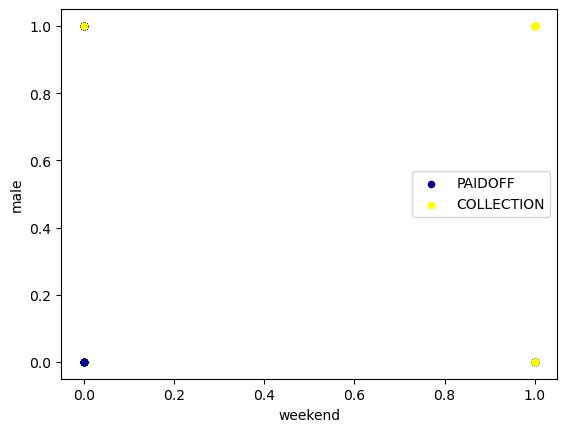

In [96]:
ax = X[X['loan_status'] == 1][0:1000].plot(kind='scatter', x='weekend', y='male', color='DarkBlue', label='PAIDOFF');
X[X['loan_status'] == 3][0:1000].plot(kind='scatter', x='weekend', y='male', color='Yellow', label='COLLECTION', ax=ax);
plt.show()

In [ ]:
#loan_ status, weekend, female　週末にローンを組む人　と 女性に基づくローンステイタスの分布を見てみましょう。

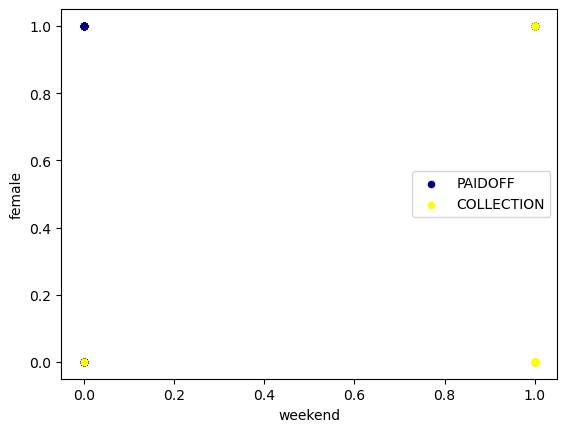

In [97]:
ax = X[X['loan_status'] == 1][0:1000].plot(kind='scatter', x='weekend', y='female', color='DarkBlue', label='PAIDOFF');
X[X['loan_status'] == 3][0:1000].plot(kind='scatter', x='weekend', y='female', color='Yellow', label='COLLECTION', ax=ax);
plt.show()

In [ ]:
#loan_ status, weekend, Gender　週末にローンを組む人　と 性別に基づくローンステイタスの分布を見てみましょう。

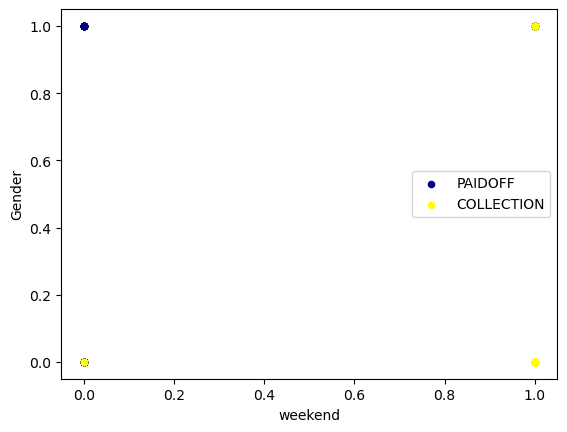

In [101]:
ax = X[X['loan_status'] == 1][0:1000].plot(kind='scatter', x='weekend', y='Gender', color='DarkBlue', label='PAIDOFF');
X[X['loan_status'] == 3][0:1000].plot(kind='scatter', x='weekend', y='Gender', color='Yellow', label='COLLECTION', ax=ax);
plt.show()

In [ ]:
#loan_ status, weekend, Principal　週末にローンを組む人　と 金額に基づくローンステイタスの分布を見てみましょう。

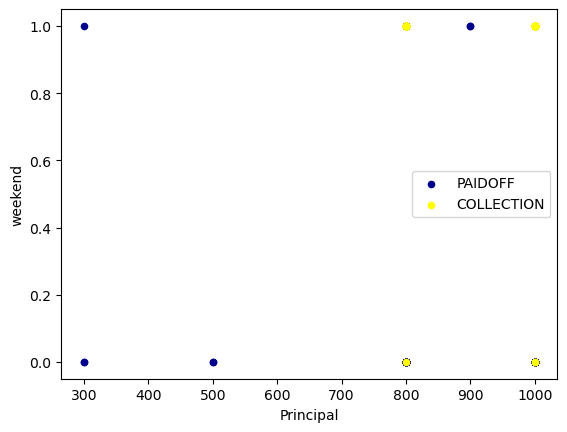

In [103]:
ax = X[X['loan_status'] == 1][0:1000].plot(kind='scatter', x='Principal', y='weekend', color='DarkBlue', label='PAIDOFF');
X[X['loan_status'] == 3][0:1000].plot(kind='scatter', x='Principal', y='weekend', color='Yellow', label='COLLECTION', ax=ax);
plt.show()

In [110]:
#Data pre-processing and selection
X.dtypes

Principal               int64
loan_status             int64
terms                   int64
age                     int64
Gender                  int64
dayofweek               int64
weekend                 int64
female                  uint8
male                    uint8
Bechalor                uint8
High School or Below    uint8
college                 uint8
dtype: object

In [ ]:
列に数値ではない値が含まれているようです。これらの行を削除できます。

In [111]:
loan_df.drop(['effective_date'], axis = 1,inplace=True)
loan_df.drop(['due_date'], axis = 1,inplace=True)

KeyError: "['effective_date'] not found in axis"

In [112]:
#Data pre-processing and selection
X.dtypes

Principal               int64
loan_status             int64
terms                   int64
age                     int64
Gender                  int64
dayofweek               int64
weekend                 int64
female                  uint8
male                    uint8
Bechalor                uint8
High School or Below    uint8
college                 uint8
dtype: object

In [116]:
loan_df.dtypes

Principal               int64
loan_status             int64
terms                   int64
age                     int64
Gender                  int64
dayofweek               int64
weekend                 int64
female                  uint8
male                    uint8
Bechalor                uint8
High School or Below    uint8
college                 uint8
dtype: object

In [117]:
feature_df = loan_df.values
X = np.asarray(feature_df)
X[0:5]

array([[1000,    1,   30,   45,    0,    3,    0,    0,    1,    0,    1,
           0],
       [1000,    1,   30,   33,    1,    3,    0,    1,    0,    1,    0,
           0],
       [1000,    1,   15,   27,    0,    3,    0,    0,    1,    0,    0,
           1],
       [1000,    1,   30,   28,    1,    4,    1,    1,    0,    0,    0,
           1],
       [1000,    1,   30,   29,    0,    4,    1,    0,    1,    0,    0,
           1]])

In [118]:
y = np.asarray(loan_df['loan_status'])
y [0:5]

array([1, 1, 1, 1, 1])

In [119]:
#Train/Test dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 12) (276,)
Test set: (70, 12) (70,)


In [120]:
#Modeling (SVM with Scikit-learn)
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [121]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [122]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [123]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        55
           3       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Confusion matrix, without normalization
[[55  0]
 [ 0  0]]


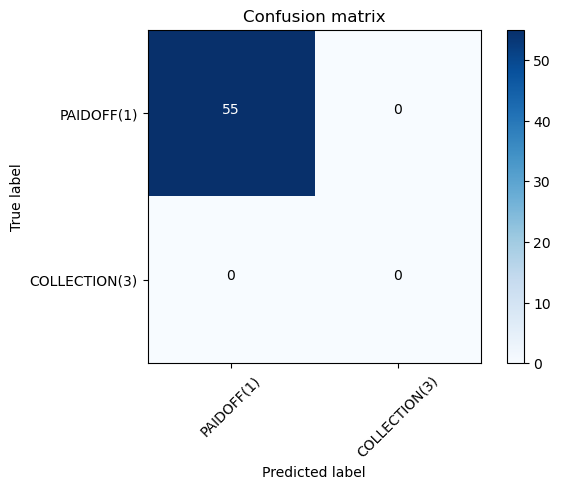

In [126]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(3)'],normalize= False,  title='Confusion matrix')

In [127]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6914285714285714

In [129]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.7857142857142857

In [131]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=1))

Avg F1-score: 1.0000
Jaccard score: 1.0000


# Logistic Regression


#レコードを分類するための統計および機械学習手法です

In [132]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [134]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,male


In [135]:
df[['Principal','loan_status', 'terms', 'effective_date', 'due_date', 'age','Gender','education']].head()
#feat = df[['Principal','loan_status','age','Gender','education']]
loan_df = df[['Principal','loan_status', 'terms', 'effective_date', 'due_date', 'age','Gender','education']]
loan_df = pd.concat([loan_df,pd.get_dummies(df['Gender'])], axis=1)
loan_df = pd.concat([loan_df,pd.get_dummies(df['education'])], axis=1)
loan_df.drop(['Master or Above'], axis = 1,inplace=True)
loan_df.drop(['education'], axis = 1,inplace=True)
loan_df.drop(['Gender'], axis = 1,inplace=True)
loan_df.head()
X = loan_df
X[0:5]

,Principal,loan_status,terms,effective_date,due_date,age,female,male,Bechalor,High School or Below,college
0,1000,0,30,2016-09-08,2016-10-07,45,0,1,0,1,0
1,1000,0,30,2016-09-08,2016-10-07,33,1,0,1,0,0
2,1000,0,15,2016-09-08,2016-09-22,27,0,1,0,0,1
3,1000,0,30,2016-09-09,2016-10-08,28,1,0,0,0,1
4,1000,0,30,2016-09-09,2016-10-08,29,0,1,0,0,1


In [136]:
loan_df.head()

,Principal,loan_status,terms,effective_date,due_date,age,female,male,Bechalor,High School or Below,college
0,1000,0,30,2016-09-08,2016-10-07,45,0,1,0,1,0
1,1000,0,30,2016-09-08,2016-10-07,33,1,0,1,0,0
2,1000,0,15,2016-09-08,2016-09-22,27,0,1,0,0,1
3,1000,0,30,2016-09-09,2016-10-08,28,1,0,0,0,1
4,1000,0,30,2016-09-09,2016-10-08,29,0,1,0,0,1


In [137]:
loan_df.shape

(346, 11)

In [138]:
X = np.asarray(loan_df[[ 'Principal', 'terms',  'age', 'female','male', 'Bechalor', 'High School or Below', 'college']])
X[0:5]

array([[1000,   30,   45,    0,    1,    0,    1,    0],
       [1000,   30,   33,    1,    0,    1,    0,    0],
       [1000,   15,   27,    0,    1,    0,    0,    1],
       [1000,   30,   28,    1,    0,    0,    0,    1],
       [1000,   30,   29,    0,    1,    0,    0,    1]])

In [139]:
y = np.asarray(loan_df[['loan_status']])
y [0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [140]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42,  0.42, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -2.38,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42,  0.42, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38, -2.38, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.42, -0.38, -0.88,  1.15]])

<h2>Train/Test dataset</h2>

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276, 1)
Test set: (70, 8) (70, 1)


<h2>Modeling (Logistic Regression with Scikit-learn)</2>

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [143]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [144]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.56, 0.44],
       [0.61, 0.39],
       [0.6 , 0.4 ],
       [0.55, 0.45],
       [0.57, 0.43],
       [0.59, 0.41],
       [0.58, 0.42],
       [0.59, 0.41],
       [0.55, 0.45],
       [0.57, 0.43],
       [0.55, 0.45],
       [0.56, 0.44],
       [0.7 , 0.3 ],
       [0.55, 0.45],
       [0.63, 0.37],
       [0.68, 0.32],
       [0.54, 0.46],
       [0.6 , 0.4 ],
       [0.56, 0.44],
       [0.58, 0.42],
       [0.65, 0.35],
       [0.57, 0.43],
       [0.55, 0.45],
       [0.63, 0.37],
       [0.69, 0.31],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.72, 0.28],
       [0.56, 0.44],
       [0.69, 0.31],
       [0.6 , 0.4 ],
       [0.63, 0.37],
       [0.6 , 0.4 ],
       [0.58, 0.42],
       [0.7 , 0.3 ],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.62, 0.38],
       [0.64, 0.36],
       [0.6 , 0.4 ],
       [0.55, 0.45],
       [0.58, 0.42],
       [0.62, 0.38],
       [0.56, 0.44],
       [0.59, 0.41],
       [0.56, 0.44],
       [0.59, 0.41],
       [0.56,

# Model Evaluation using Test set


In [145]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


In [146]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-09-28 00:22:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-09-28 00:22:50 (40.5 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [147]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


<h2>Evaluation</2>

In [148]:
#jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7857142857142857

### Load Test set for evaluation


In [149]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 0 15]
 [ 0 55]]


Confusion matrix, without normalization
[[ 0 15]
 [ 0 55]]


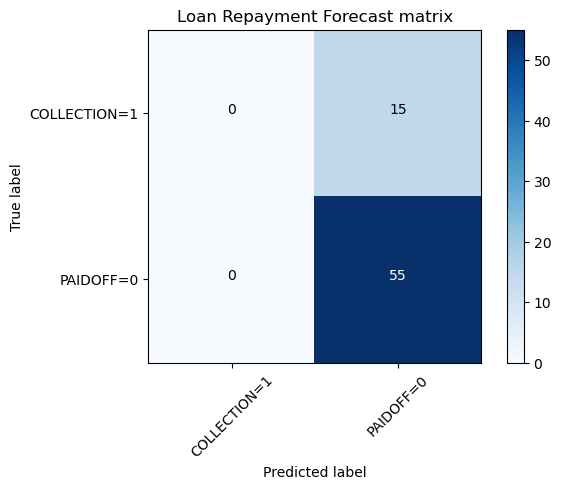

In [151]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION=1','PAIDOFF=0'],normalize= False,  title='Loan Repayment Forecast matrix')

In [152]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        55
           1       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70



In [153]:
#log loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.600096603233237

First, download and load the test set:


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
